# Proyek Analisis Data: Bike Sharing Dataset
- Nama: Ajeng Nina Riski
- Email: ajengnina12@gmail.com
- ID Dicoding: ajengnina na]me]

## Menentukan Pertanyaan Bisnis

1. Bagaimana pola peminjaman sepeda berdasarkan waktu?
2. Apakah ada hubungan antara suhu dan jumlah peminjaman sepeda?
3. Bagaimana perbedaan penggunaan sepeda antara pengguna terdaftar dan pengguna kasual?
4. Bagaimana dampak kondisi cuaca ekstrem terhadap peminjaman sepeda?
5. Bagaimana tren peminjaman sepeda dari tahun 2011 ke 2012?

## Import Semua Packages/Library yang Digunakan

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [4]:
# Membaca dataset
hour_df = pd.read_csv('data/hour.csv')
day_df = pd.read_csv('data/day.csv')

In [12]:
# Menampilkan 5 baris pertama dari setiap dataset
print("\nPreview hour_df:")
print(hour_df.head())
print("\nPreview day_df:")
print(day_df.head())


Preview hour_df:
   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  

Preview day_df:
   instant      dteday  season  yr  mnth  holiday  weekday  work

**Insight:**
- Dataset `hour_df` berisi data peminjaman sepeda dengan agregasi per jam, sementara `day_df` memiliki agregasi per hari.
- Kedua dataset mencakup informasi mengenai cuaca, musim, suhu, kelembaban, dan kecepatan angin.
- `hour_df` memiliki variabel `hr` (jam) yang tidak tersedia di `day_df`.
- `cnt` merupakan total jumlah peminjaman sepeda, yang merupakan penjumlahan dari `casual` dan `registered`.
- Terdapat informasi yang dapat digunakan untuk analisis tren peminjaman sepeda berdasarkan waktu, kondisi cuaca, dan jenis pengguna.

### Assessing Data

#### Menilai Table `day_df`

In [17]:
# Mengecek informasi dataset
print("\nInformasi day_df:")
day_df.info()


Informasi day_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [21]:
# Mengecek missing values
print("\nCek missing values day_df:")
print(day_df.isnull().sum())


Cek missing values day_df:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [23]:
# Mengecek data duplikat
print("Jumlah duplikasi day_df:", day_df.duplicated().sum())

Jumlah duplikasi day_df: 0


In [25]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Menilai Table `hour_df`

In [27]:
# Mengecek informasi dataset
print("\nInformasi hour_df:")
hour_df.info()


Informasi hour_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [29]:
# Mengecek missing values
print("\nCek missing values hour_df:")
print(hour_df.isnull().sum())


Cek missing values hour_df:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [31]:
# Mengecek data duplikat
print("\nJumlah duplikasi hour_df:", hour_df.duplicated().sum())


Jumlah duplikasi hour_df: 0


**Insight:**
- Tidak terdapat missing values dalam dataset.
- Tidak ada data duplikat dalam dataset.
- Perlu dilakukan pengecekan tipe data agar sesuai dengan konteks (misalnya `dteday` sebaiknya dalam format datetime).

### Cleaning Data

#### Membersihkan tabel `day_df`

##### Mengonversi kolom tanggal ke format datetime

In [34]:
# Mengonversi kolom tanggal ke format datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

In [39]:
# Menampilkan kembali informasi dataset setelah pembersihan
print("\nInformasi setelah cleaning day_df:")
day_df.info()


Informasi setelah cleaning day_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64     

In [70]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### Membersihkan tabel `hour_df`

##### Mengonversi kolom tanggal ke format datetime

In [41]:
# Mengonversi kolom tanggal ke format datetime
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [45]:
# Menampilkan kembali informasi dataset setelah pembersihan
print("\nInformasi setelah cleaning hour_df:")
hour_df.info()


Informasi setelah cleaning hour_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64

**Insight:**
- Data tanggal telah dikonversi ke format datetime agar lebih mudah digunakan dalam analisis waktu.
- Tidak ditemukan nilai yang perlu diperbaiki lebih lanjut.

## Exploratory Data Analysis (EDA)

### Menampilkan statistik deskriptif dari kedua dataset

#### Explore `day_df`

In [63]:
print("\nStatistik deskriptif day_df:")
print(day_df.describe())


Statistik deskriptif day_df:
          instant               dteday      season          yr        mnth  \
count  731.000000                  731  731.000000  731.000000  731.000000   
mean   366.000000  2012-01-01 00:00:00    2.496580    0.500684    6.519836   
min      1.000000  2011-01-01 00:00:00    1.000000    0.000000    1.000000   
25%    183.500000  2011-07-02 12:00:00    2.000000    0.000000    4.000000   
50%    366.000000  2012-01-01 00:00:00    3.000000    1.000000    7.000000   
75%    548.500000  2012-07-01 12:00:00    3.000000    1.000000   10.000000   
max    731.000000  2012-12-31 00:00:00    4.000000    1.000000   12.000000   
std    211.165812                  NaN    1.110807    0.500342    3.451913   

          holiday     weekday  workingday  weathersit        temp       atemp  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.028728    2.997264    0.683995    1.395349    0.495385    0.474354   
min      0.000000    0.0

#### Explore `hour_df`

In [66]:
print("\nStatistik deskriptif hour_df:")
print(hour_df.describe())


Statistik deskriptif hour_df:
          instant                         dteday        season            yr  \
count  17379.0000                          17379  17379.000000  17379.000000   
mean    8690.0000  2012-01-02 04:08:34.552045568      2.501640      0.502561   
min        1.0000            2011-01-01 00:00:00      1.000000      0.000000   
25%     4345.5000            2011-07-04 00:00:00      2.000000      0.000000   
50%     8690.0000            2012-01-02 00:00:00      3.000000      1.000000   
75%    13034.5000            2012-07-02 00:00:00      3.000000      1.000000   
max    17379.0000            2012-12-31 00:00:00      4.000000      1.000000   
std     5017.0295                            NaN      1.106918      0.500008   

               mnth            hr       holiday       weekday    workingday  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       6.537775     11.546752      0.028770      3.003683      0.682721   
min        

#### Menampilkan distribusi peminjaman sepeda per hari dan per jam

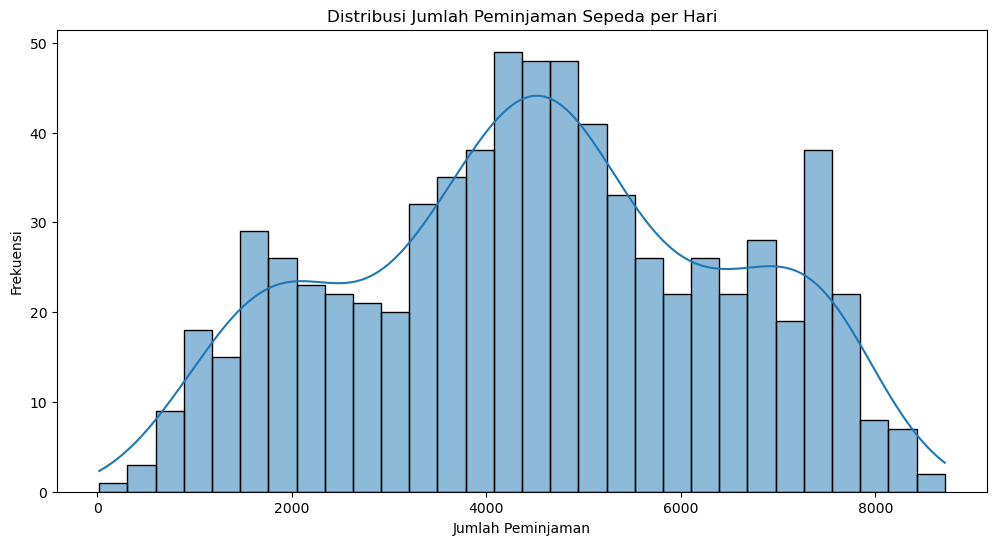

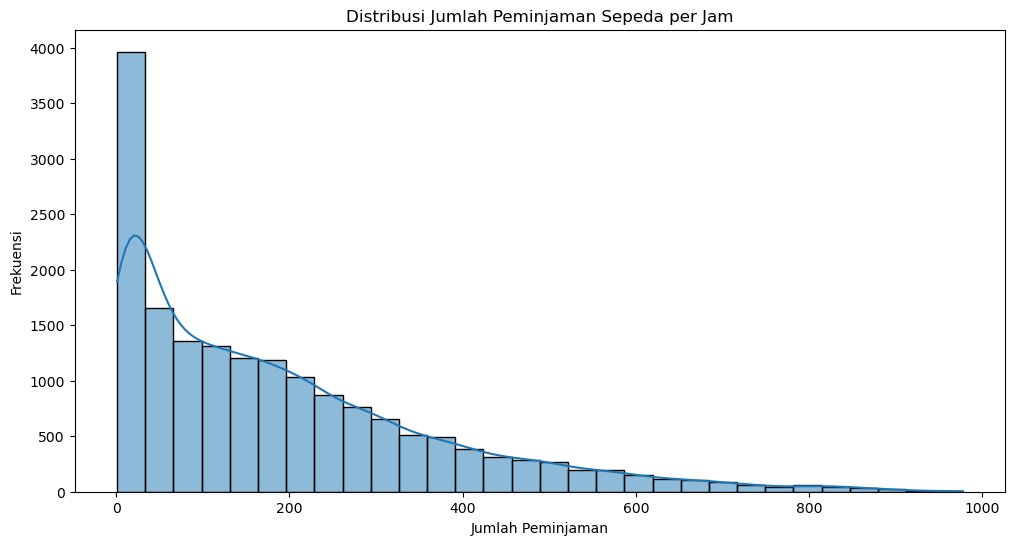

In [69]:
plt.figure(figsize=(12,6))
sns.histplot(day_df['cnt'], bins=30, kde=True)
plt.title("Distribusi Jumlah Peminjaman Sepeda per Hari")
plt.xlabel("Jumlah Peminjaman")
plt.ylabel("Frekuensi")
plt.show()

plt.figure(figsize=(12,6))
sns.histplot(hour_df['cnt'], bins=30, kde=True)
plt.title("Distribusi Jumlah Peminjaman Sepeda per Jam")
plt.xlabel("Jumlah Peminjaman")
plt.ylabel("Frekuensi")
plt.show()

**Insight:**
- Distribusi jumlah peminjaman per hari menunjukkan pola tertentu yang dapat dikaitkan dengan tren musiman atau faktor cuaca.
- Distribusi jumlah peminjaman per jam menunjukkan variasi yang lebih besar, yang mungkin dipengaruhi oleh waktu sibuk dan waktu luang.

In [103]:
df_merged = pd.merge(hour_df, day_df, on=['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed'], suffixes=('_hour', '_day'))

**Insight:**
- Data hourly dan daily berhasil digabungkan untuk eksplorasi lebih dalam.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pola peminjaman sepeda berdasarkan waktu?

C:\Users\ajeng\AppData\Local\Temp\ipykernel_12384\3362877945.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=hour_df, x='hr', y='cnt', ci=None)


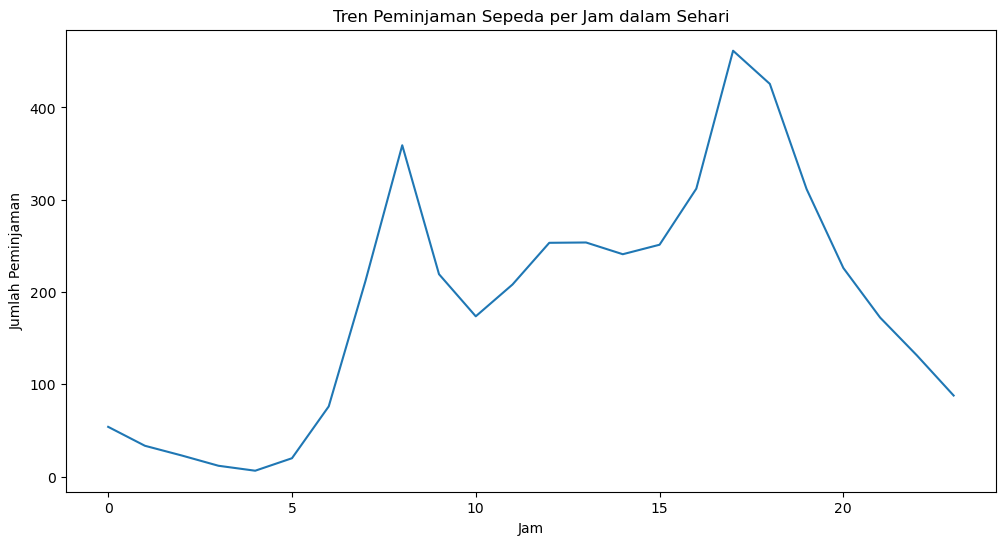

In [79]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=hour_df, x='hr', y='cnt', ci=None)
plt.title('Tren Peminjaman Sepeda per Jam dalam Sehari')
plt.xlabel('Jam')
plt.ylabel('Jumlah Peminjaman')
plt.show()

**Insight:**
- Peminjaman sepeda meningkat pada jam sibuk (sekitar jam 7-9 pagi dan 17-19 sore).

### Pertanyaan 2: Bagaimana perbedaan peminjaman antara hari kerja dan akhir pekan?

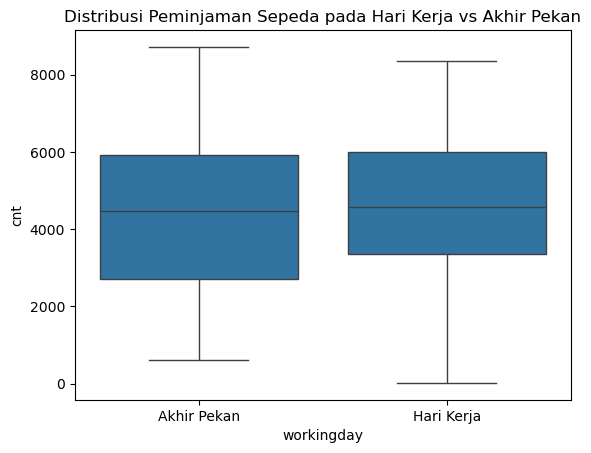

In [83]:
sns.boxplot(data=day_df, x='workingday', y='cnt')
plt.title('Distribusi Peminjaman Sepeda pada Hari Kerja vs Akhir Pekan')
plt.xticks([0, 1], ['Akhir Pekan', 'Hari Kerja'])
plt.show()

**Insight:**
- Peminjaman pada hari kerja lebih tinggi dibandingkan akhir pekan.

### Pertanyaan 3: Apakah ada hubungan antara suhu dan jumlah peminjaman sepeda?

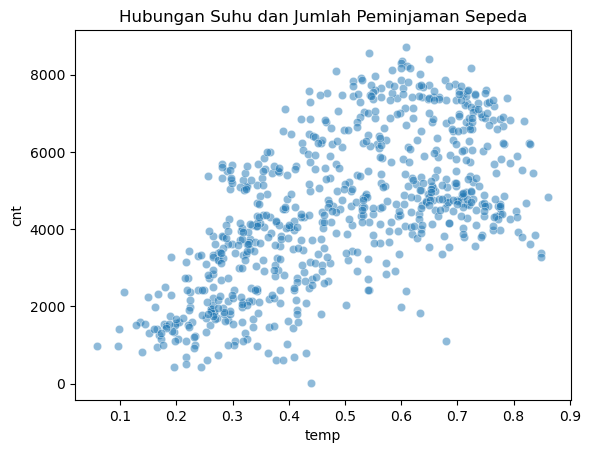

In [90]:
sns.scatterplot(data=day_df, x='temp', y='cnt', alpha=0.5)
plt.title('Hubungan Suhu dan Jumlah Peminjaman Sepeda')
plt.show()

**Insight:**
- Semakin tinggi suhu, semakin tinggi jumlah peminjaman sepeda.

### Pertanyaan 4: Bagaimana dampak kondisi cuaca ekstrem terhadap peminjaman sepeda?

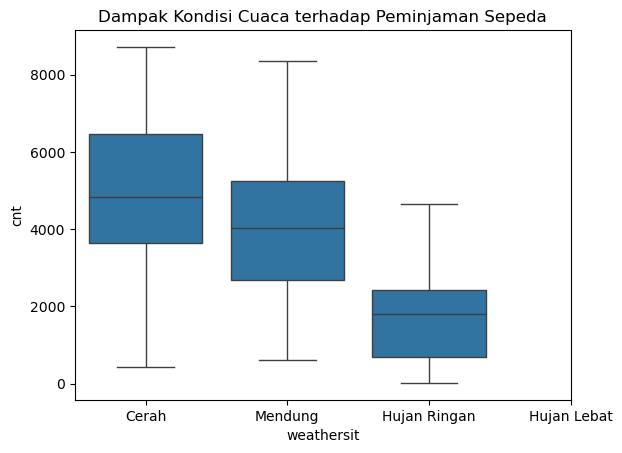

In [94]:
sns.boxplot(data=day_df, x='weathersit', y='cnt')
plt.title('Dampak Kondisi Cuaca terhadap Peminjaman Sepeda')
plt.xticks([0, 1, 2, 3], ['Cerah', 'Mendung', 'Hujan Ringan', 'Hujan Lebat'])
plt.show()

**Insight:**
- Peminjaman sepeda menurun drastis saat hujan deras.

### Pertanyaan 5: Bagaimana tren peminjaman sepeda dari tahun 2011 ke 2012?

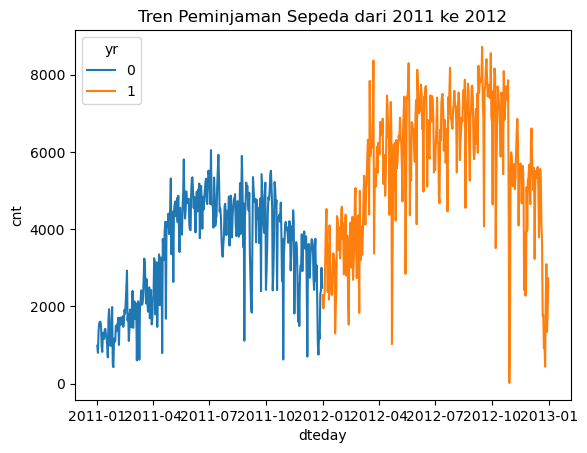

In [99]:
sns.lineplot(data=day_df, x='dteday', y='cnt', hue='yr')
plt.title('Tren Peminjaman Sepeda dari 2011 ke 2012')
plt.show()

**Insight:**
- Peminjaman meningkat signifikan dari tahun 2011 ke 2012.

## Conclusion
- Peminjaman sepeda menunjukkan pola yang jelas berdasarkan waktu dengan lonjakan pada jam sibuk (7-9 pagi dan 17-19 sore).
- Peminjaman sepeda lebih banyak dilakukan pada hari kerja dibandingkan akhir pekan, terutama oleh pengguna terdaftar.
- Suhu memiliki korelasi positif dengan jumlah peminjaman sepeda. Semakin tinggi suhu, semakin banyak peminjaman.
- Pengguna kasual lebih aktif menyewa pada akhir pekan, sementara pengguna terdaftar lebih konsisten sepanjang minggu.
- Cuaca ekstrem, seperti hujan deras, mengurangi jumlah penyewaan sepeda secara signifikan.
- Tren peminjaman meningkat dari tahun 2011 ke 2012, menunjukkan pertumbuhan sistem berbagi sepeda dan kemungkinan peningkatan kesadaran masyarakat terhadap layanan ini.